In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("aq_milan_summer_2020.csv")
data.head()

,local_datetime,pm2p5
0,2020-07-24 18:00:00,11.67
1,2020-07-24 19:00:00,9.25
2,2020-07-24 20:00:00,6.29
3,2020-07-24 21:00:00,5.50
4,2020-07-24 22:00:00,9.50


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1398 entries, 0 to 1397
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   local_datetime  1398 non-null   object 
 1   pm2p5           1398 non-null   float64
dtypes: float64(1), object(1)
memory usage: 22.0+ KB


In [4]:
data.describe()

,pm2p5
count,1398.000000
mean,12.668863
std,8.568262
min,1.000000
25%,6.000000
50%,10.225000
75%,17.937500
max,52.000000


In [5]:
data_new = data.copy()

In [6]:
data["local_datetime"] = pd.to_datetime(data["local_datetime"])
data = data.set_index("local_datetime")

In [7]:
data

,pm2p5
local_datetime,
2020-07-24 18:00:00,11.67
2020-07-24 19:00:00,9.25
2020-07-24 20:00:00,6.29
2020-07-24 21:00:00,5.50
2020-07-24 22:00:00,9.50
...,...
2020-09-20 19:00:00,20.25
2020-09-20 20:00:00,22.75
2020-09-20 21:00:00,27.50


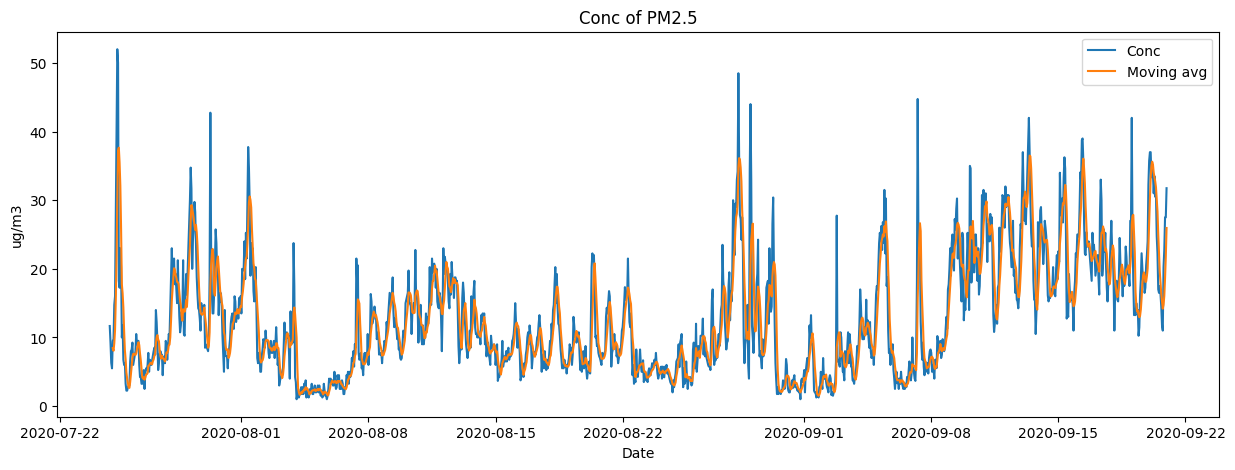

In [8]:
roll_mean = data.pm2p5.rolling(5).mean()
roll_std = data.pm2p5.rolling(5).std()

plt.figure(figsize = (15, 5))

plt.plot(data, label = "Conc")
plt.plot(roll_mean, label = "Moving avg")
plt.xlabel("Date")
plt.ylabel("ug/m3")

plt.legend()
plt.title("Conc of PM2.5")
plt.show()

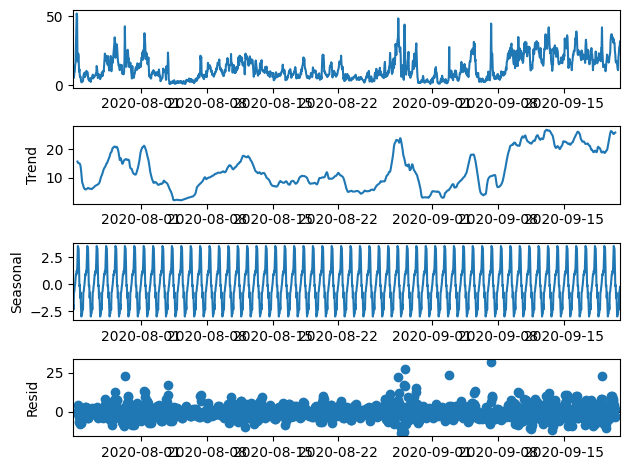

In [9]:
from statsmodels.tsa.seasonal import seasonal_decompose

dec_add = seasonal_decompose(data, model = "additive")

dec_add.plot()
plt.show()

C:\Users\Achu\miniconda3\envs\Projekt\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


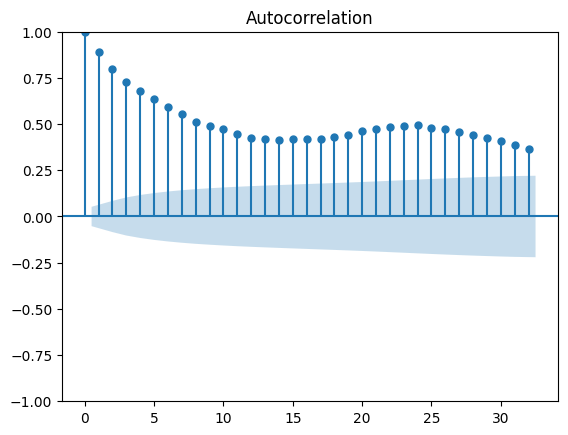

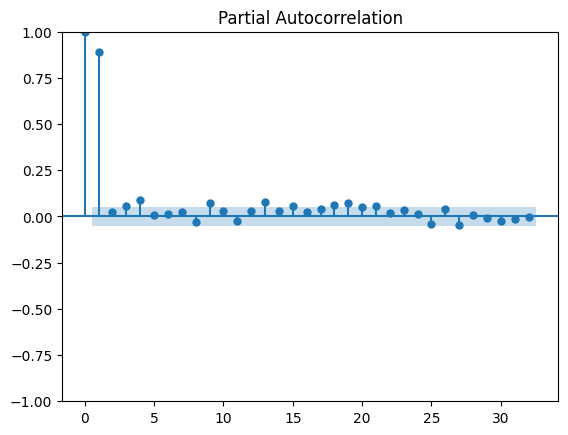

In [10]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(data)
plot_pacf(data)
plt.show()

In [11]:
from statsmodels.tsa.stattools import adfuller

adf = adfuller(data)
print("ADF:", adf[0])

print("p-value:", adf[1])

print("\nCritical Values:\n")
for key, value in adf[4].items():
    print(key, value, sep = ": ")

ADF: -2.7488924633053893
p-value: 0.06595307292193427

Critical Values:

1%: -3.4351078301822016
5%: -2.8636412316027577
10%: -2.5678886927682663


From ADF test, data is stationary

In [12]:
from statsmodels.tsa.arima.model import ARIMA

train = data[: -10*24]
test = data[-10*24: ]

model = ARIMA(train, order = (3, 0, 2), seasonal_order = (3, 0, 2, 24))
model_fit = model.fit()

C:\Users\Achu\miniconda3\envs\Projekt\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
C:\Users\Achu\miniconda3\envs\Projekt\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
C:\Users\Achu\miniconda3\envs\Projekt\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
C:\Users\Achu\miniconda3\envs\Projekt\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


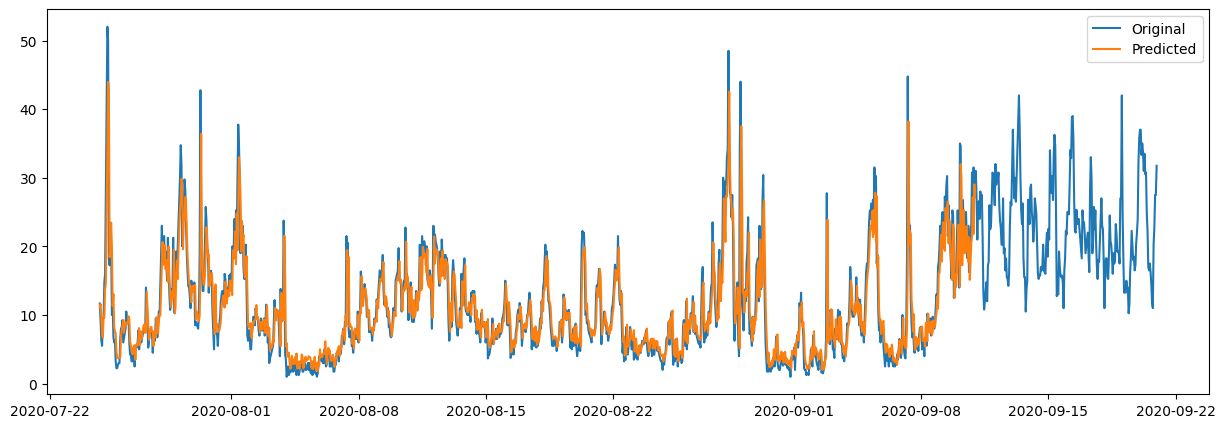

In [13]:
plt.figure(figsize = (15, 5))

plt.plot(data, label = 'Original')
plt.plot(model_fit.predict(), label = 'Predicted')
plt.legend()
plt.show()

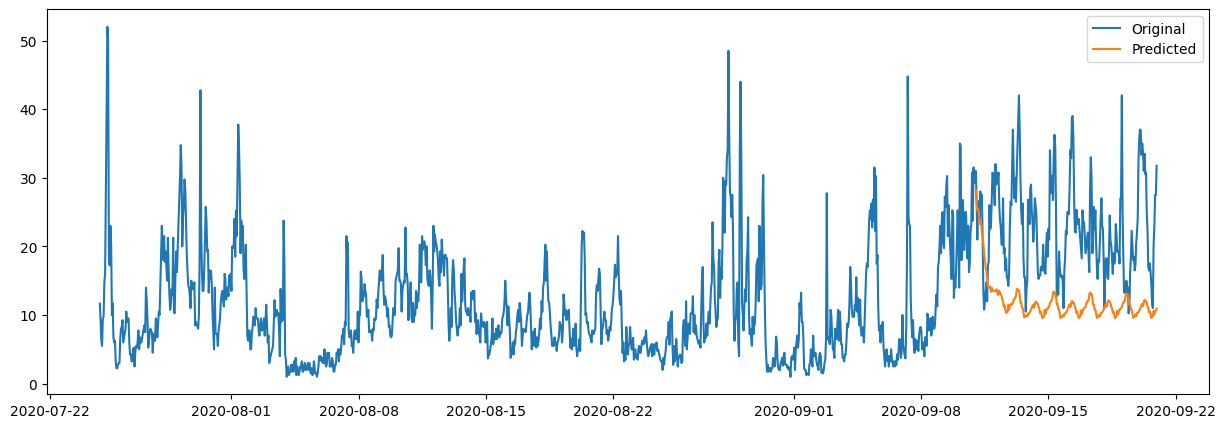

In [14]:
pred = model_fit.forecast(10*24)

plt.figure(figsize = (15, 5))

plt.plot(data, label = 'Original')
plt.plot(pred, label = 'Predicted')
plt.legend()
plt.show()

In [15]:
from sklearn.metrics import r2_score

r2_score(pred, test)

-16.45476763236015